In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("fifa21_raw_data.csv",low_memory=False)

In [5]:
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [6]:
df.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

In [7]:
for column in df.columns:
    unique_types = df[column].apply(type).unique()
    print(f"Column '{column}' has unique data types: {unique_types}")


Column 'photoUrl' has unique data types: [<class 'str'>]
Column 'LongName' has unique data types: [<class 'str'>]
Column 'playerUrl' has unique data types: [<class 'str'>]
Column 'Nationality' has unique data types: [<class 'str'>]
Column 'Positions' has unique data types: [<class 'str'>]
Column 'Name' has unique data types: [<class 'str'>]
Column 'Age' has unique data types: [<class 'int'>]
Column '↓OVA' has unique data types: [<class 'int'>]
Column 'POT' has unique data types: [<class 'int'>]
Column 'Team & Contract' has unique data types: [<class 'str'>]
Column 'ID' has unique data types: [<class 'int'>]
Column 'Height' has unique data types: [<class 'str'>]
Column 'Weight' has unique data types: [<class 'str'>]
Column 'foot' has unique data types: [<class 'str'>]
Column 'BOV' has unique data types: [<class 'int'>]
Column 'BP' has unique data types: [<class 'str'>]
Column 'Growth' has unique data types: [<class 'int'>]
Column 'Joined' has unique data types: [<class 'str'>]
Column 'L

In [9]:
df['Loan Date End'] = df['Loan Date End'].astype(str)

In [10]:
# Removing non-numeric characters and converting to float
for col in ['Value', 'Wage', 'Release Clause']:
    df[col] = df[col].replace('[€MK]', '', regex=True).astype(float)

In [11]:
# Check for Missing Values
missing_values = df.isnull().sum()
print(missing_values)

photoUrl       0
LongName       0
playerUrl      0
Nationality    0
Positions      0
              ..
PAS            0
DRI            0
DEF            0
PHY            0
Hits           0
Length: 77, dtype: int64


In [12]:
# check for duplicates
duplicates = df.duplicated()
print("Number of duplicate rows:",duplicates.sum())

Number of duplicate rows: 1


In [13]:
duplicate_index = df[df.duplicated()].index[0]
duplicate_row = df.loc[duplicate_index]
print(duplicate_row)

photoUrl        https://cdn.sofifa.com/players/251/698/21_60.png
LongName                                           Kevin Berlaso
playerUrl      http://sofifa.com/player/251698/kevin-berlaso/...
Nationality                                              Ecuador
Positions                                                     RB
                                     ...                        
PAS                                                           69
DRI                                                           77
DEF                                                           72
PHY                                                           68
Hits                                                        \n12
Name: 944, Length: 77, dtype: object


In [15]:
# check for data types
data_types = df.dtypes
print(data_types)

photoUrl       object
LongName       object
playerUrl      object
Nationality    object
Positions      object
                ...  
PAS             int64
DRI             int64
DEF             int64
PHY             int64
Hits           object
Length: 77, dtype: object


In [16]:
hits_counts = df['Hits'].value_counts()
print(hits_counts)

\n1      4321
\n2      3095
\n3      2083
\n4      1407
\n5      1064
         ... 
\n356       1
\n984       1
\n2K        1
\n603       1
\n208       1
Name: Hits, Length: 374, dtype: int64


In [17]:
# Clean the 'Hits' column
#Remove non-numeric characters and convert to numeric from Hits
df['Hits'] = df['Hits'].str.replace('[^0-9]', '',regex=True)
# Convert to numeric
df['Hits'] = pd.to_numeric(df['Hits'],errors='coerce')

In [19]:
# After cleaning
print(df['Hits'].value_counts())

1      4322
2      3096
3      2083
4      1407
5      1064
       ... 
794       1
243       1
356       1
984       1
208       1
Name: Hits, Length: 363, dtype: int64


In [20]:
print(data_types)

photoUrl       object
LongName       object
playerUrl      object
Nationality    object
Positions      object
                ...  
PAS             int64
DRI             int64
DEF             int64
PHY             int64
Hits           object
Length: 77, dtype: object


In [26]:
#Check Column Values:
sample_data = df.sample(5)
df['Team & Contract'] = df['Team & Contract'].str.replace('\n', ' ').str.strip()
print(sample_data)

                                               photoUrl             LongName  \
7571   https://cdn.sofifa.com/players/182/837/21_60.png       Kazenga LuaLua   
17173  https://cdn.sofifa.com/players/231/682/21_60.png  Thomas Heward-Belle   
18454  https://cdn.sofifa.com/players/255/600/21_60.png              Yu Xing   
8871   https://cdn.sofifa.com/players/237/407/21_60.png         Chris Durkin   
6543   https://cdn.sofifa.com/players/219/952/21_60.png       Liam Henderson   

                                               playerUrl    Nationality  \
7571   http://sofifa.com/player/182837/kazenga-lualua...       DR Congo   
17173  http://sofifa.com/player/231682/thomas-heward-...      Australia   
18454    http://sofifa.com/player/255600/yu-xing/210005/       China PR   
8871   http://sofifa.com/player/237407/chris-durkin/2...  United States   
6543   http://sofifa.com/player/219952/liam-henderson...       Scotland   

       Positions             Name  Age  ↓OVA  POT  \
7571    ST LW L

In [27]:
summary_stats = df.describe()
print(summary_stats)

                Age          ↓OVA           POT             ID           BOV  \
count  18979.000000  18979.000000  18979.000000   18979.000000  18979.000000   
mean      25.194583     65.718636     71.136098  226404.790242     66.751620   
std        4.710753      6.968999      6.114176   27141.673349      6.747017   
min       16.000000     47.000000     47.000000      41.000000     48.000000   
25%       21.000000     61.000000     67.000000  210135.000000     62.000000   
50%       25.000000     66.000000     71.000000  232424.000000     67.000000   
75%       29.000000     70.000000     75.000000  246925.500000     71.000000   
max       53.000000     93.000000     95.000000  259216.000000     93.000000   

             Growth         Value          Wage  Release Clause     Attacking  \
count  18979.000000  18979.000000  18979.000000    18979.000000  18979.000000   
mean       5.417461    268.641393    131.795932      217.260683    248.938616   
std        5.663954    286.116397   

In [29]:
print(df.columns)

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

In [31]:
print(df[['Height','Weight']].head())

  Height  Weight
0   5'7"  159lbs
1   6'2"  183lbs
2   6'2"  192lbs
3  5'11"  154lbs
4   5'9"  150lbs


In [39]:
# Remove unnecessary newline characters from all columns
df = df.replace('\n', '', regex=True)

In [40]:
# Display the first few rows of the DataFrame
print(df.head())

                                           photoUrl  \
0  https://cdn.sofifa.com/players/158/023/21_60.png   
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/21_60.png   

                       LongName  \
0                  Lionel Messi   
1  C. Ronaldo dos Santos Aveiro   
2                     Jan Oblak   
3               Kevin De Bruyne   
4    Neymar da Silva Santos Jr.   

                                           playerUrl Nationality Positions  \
0  http://sofifa.com/player/158023/lionel-messi/2...   Argentina  RW ST CF   
1  http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal     ST LW   
2  http://sofifa.com/player/200389/jan-oblak/210005/    Slovenia        GK   
3  http://sofifa.com/player/192985/kevin-de-bruyn...     Belgium    CAM CM   
4  http://sofifa.com/player/190871/neymar-da-silv...      Brazil    

In [41]:
print(df['Joined'])

0         Jul 1, 2004
1        Jul 10, 2018
2        Jul 16, 2014
3        Aug 30, 2015
4         Aug 3, 2017
             ...     
18974     Aug 1, 2020
18975     Aug 1, 2020
18976    Jul 13, 2018
18977     Aug 1, 2020
18978     Jan 1, 2020
Name: Joined, Length: 18979, dtype: object


In [44]:
# Players joined over 10 years
import pandas as pd
# Convert the 'Joined' column to datetime

from datetime import datetime

df['Joined'] = pd.to_datetime(df['Joined'])
current_date = datetime.now()

# Calculate the difference in years between 'Joined' date and current date
df['Years_at_club'] = (current_date - df['Joined']).dt.days / 365.25

# Filter players who have been playing at the club for more than 10 years
players_over_10_years = df[df['Years_at_club'] > 10]

# Display the players who have been playing at the club for more than 10 years
print(players_over_10_years[['LongName', 'Team & Contract', 'Joined', 'Years_at_club']])

                                LongName                Team & Contract  \
0                           Lionel Messi       FC Barcelona 2004 ~ 2021   
12     Carlos Henrique Venancio Casimiro        Real Madrid 2013 ~ 2023   
14                          Manuel Neuer  FC Bayern München 2011 ~ 2023   
15                         Karim Benzema        Real Madrid 2009 ~ 2022   
16                   Sergio Ramos García        Real Madrid 2005 ~ 2021   
...                                  ...                            ...   
17207                         Hanlin Yao         Wuhan Zall 2010 ~ 2020   
17247                     Omar Al Sunain         Ettifaq FC 2013 ~ 2023   
17276                        Feiya Chang   Guangzhou R&F FC 2013 ~ 2020   
17811                         Shoubo Sun         Wuhan Zall 2013 ~ 2020   
18430                   Basil Al Bahrani           Al Fateh 2013 ~ 2022   

          Joined  Years_at_club  
0     2004-07-01      19.154004  
12    2013-07-11      10.127310

In [54]:
# Before Conversion we can see default values of 'Value', 'Wage', and 'Release Clause' columns
print(df[['Value', 'Wage', 'Release Clause']])

        Value   Wage Release Clause
0      €67.5M  €560K        €138.4M
1        €46M  €220K         €75.9M
2        €75M  €125K        €159.4M
3        €87M  €370K          €161M
4        €90M  €270K        €166.5M
...       ...    ...            ...
18974    €35K    €1K           €57K
18975    €60K   €500          €165K
18976    €40K    €1K           €70K
18977    €60K   €500          €165K
18978    €60K   €500          €167K

[18979 rows x 3 columns]


In [55]:
# After Conversion 
# Define a function to convert the value strings to actual numbers
def convert_value_string(value_str):
    if value_str[-1] == 'M':
        return float(value_str[1:-1]) * 1000000
    elif value_str[-1] == 'K':
        return float(value_str[1:-1]) * 1000
    else:
        return float(value_str[1:])
# Apply the function to the 'Value', 'Wage', and 'Release Clause' columns
df['Value']=df['Value'].apply(convert_value_string)
df['Wage'] = df['Wage'].apply(convert_value_string)
df['Release Clause'] = df['Release Clause'].apply(convert_value_string)

# Display the first few rows of the modified dataframe
print(df[['Value', 'Wage', 'Release Clause']].head())

        Value      Wage  Release Clause
0  67500000.0  560000.0     138400000.0
1  46000000.0  220000.0      75900000.0
2  75000000.0  125000.0     159400000.0
3  87000000.0  370000.0     161000000.0
4  90000000.0  270000.0     166500000.0


In [56]:
print(df.columns)

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

In [57]:
#More Cleaning

columns_with_stars = []

for column in df.columns:
    if df[column].apply(lambda x: isinstance(x, str) and '★' in x).any():
        columns_with_stars.append(column)

print("Columns with 'star' characters:", columns_with_stars)


Columns with 'star' characters: ['W/F', 'SM', 'IR']


In [60]:
# List of columns with 'star' characters
columns_with_stars = ['W/F', 'SM', 'IR']

# Display the columns with 'star' characters
for column in columns_with_stars:
    print(f"Column '{column}':\n{df[column].value_counts()}\n")

Column 'W/F':
3 ★    11695
2 ★     4141
4 ★     2722
5 ★      283
1 ★      138
Name: W/F, dtype: int64

Column 'SM':
2★    9142
3★    6576
1★    2075
4★    1131
5★      55
Name: SM, dtype: int64

Column 'IR':
1 ★    17628
2 ★     1019
3 ★      281
4 ★       45
5 ★        6
Name: IR, dtype: int64



In [62]:
# List of columns with 'star' characters
columns_with_stars = ['W/F', 'SM', 'IR']

# Remove '*' from columns and convert to numerical values
for column in columns_with_stars:
    df[column] = df[column].str.replace('★', '').astype(int)


    # Display the updated DataFrame
print(df[columns_with_stars])

       W/F  SM  IR
0        4   4   5
1        4   5   5
2        3   1   3
3        5   4   4
4        5   5   5
...    ...  ..  ..
18974    2   2   1
18975    2   2   1
18976    2   2   1
18977    2   2   1
18978    3   2   1

[18979 rows x 3 columns]


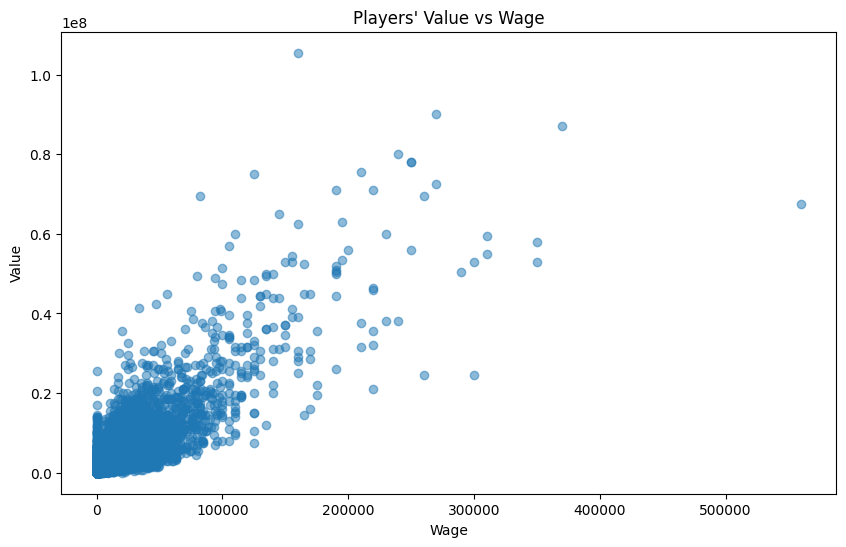

In [64]:
# Convert 'Value' and 'Wage' columns to numerical values

import matplotlib.pyplot as plt
def convert_value(value_str):
    if isinstance(value_str, float):
        return value_str  # Return numeric values as is
    elif 'M' in value_str:
        return float(value_str.replace('M', '')) * 1000000
    elif 'K' in value_str:
        return float(value_str.replace('K', '')) * 1000
    else:
        return float(value_str)

df['Value'] = df['Value'].apply(convert_value)
df['Wage'] = df['Wage'].apply(convert_value)

# Scatter plot between 'Wage' and 'Value'
plt.figure(figsize=(10, 6))
plt.scatter(df['Wage'], df['Value'], alpha=0.5)
plt.xlabel('Wage')
plt.ylabel('Value')
plt.title('Players\' Value vs Wage')
plt.show()

In [72]:
fifa21_raw_data.to_csv('cleaned_fifa21_data.csv', index=False)

NameError: name 'fifa21_raw_data' is not defined

In [73]:
# Assuming your cleaned DataFrame is named cleaned_df
cleaned_df.to_csv('cleaned_fifa21_data.csv', index=False)


NameError: name 'cleaned_df' is not defined

In [74]:
# Save the cleaned DataFrame as a CSV file
df.to_csv('cleaned_fifa21_data.csv', index=False)

In [75]:
import os
print(os.getcwd())


C:\Users\zohai\Documents
